In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import geopandas as gpd
import geoplot as gplt
import geoplot.crs as gcrs
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import matplotlib as mpl

gd_src = '../geodata/{}/{}-c005-s010-vw-pr.geojson'
onemil_src = './node_modules/preprocessing/data/1Mdataset.csv'
nc_src = '../well_data/src_data.csv'

In [2]:
def load_gd(level='dis'):
    return gpd.read_file(
        gd_src.format(level, level)
    )

In [3]:
def disp_gd(level):
    gd = load_gd(level)
    gd.info()
    print(gd.head())
    gplt.polyplot(
        gd, 
        projection=gcrs.AlbersEqualArea(), 
        edgecolor='blue', 
        linewidth=0.05,
        figsize=(10,10)
    )

In [4]:
def load_wells(src=nc_src):
    return pd.read_csv(src)

In [5]:
gdf = load_gd('div')
print(gdf['geometry'].to_crs(epsg=6933).area.mean())
print(gdf['geometry'].to_crs(epsg=6933).area.std())
print(gdf['area'].mean())
print('---------------------')
gdf = load_gd('dis')
print(gdf['geometry'].to_crs(epsg=6933).area.mean())
print(gdf['geometry'].to_crs(epsg=6933).area.std())
print(gdf['area'].mean())
print('---------------------')
gdf = load_gd('upa')
print(gdf['geometry'].to_crs(epsg=6933).area.mean())
print(gdf['geometry'].to_crs(epsg=6933).area.std())
print(gdf['area'].mean())
print('---------------------')
gdf = load_gd('uni')
print(gdf['geometry'].to_crs(epsg=6933).area.mean())
print(gdf['geometry'].to_crs(epsg=6933).area.std())
print(gdf['area'].mean())
print('---------------------')
gdf = load_gd('mou')
print(gdf['geometry'].to_crs(epsg=6933).area.mean())
print(gdf['geometry'].to_crs(epsg=6933).area.std())
print(gdf['area'].mean())

17481863671.67907
6928488388.064251
17481502552.245834
---------------------
2185157547.28574
1080004324.845711
2185187819.0306034
---------------------
257077965.38737303
184769892.17091545
257080919.88595524
---------------------
27102808.39893445
41058430.806580245
0.002402438771060515
---------------------
2395118.3274408844
8434886.9294413
nan


In [6]:
print(gdf['div'].nunique())
print(gdf['dis'].nunique())
print(gdf['upa'].nunique())
print(gdf['uni'].nunique())
print(gdf['mou'].nunique())

10
65
480
4131
38469


In [7]:
print(load_gd('mou')['div'].unique())
print('--------------------------------')
print(load_gd('div')['div'].unique())

['Rangpur' 'Mymensingh' None 'Mymensing' 'Rajshahi' 'Sylhet' 'Dhaka'
 'Chittagong' 'Khulna' 'Barisal' 'Chittagon']
--------------------------------
['Mymensingh' 'Khulna' 'Sylhet' 'Rajshahi' 'Rangpur' 'Dhaka' 'Barisal'
 'Chittagong']


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 868678 entries, 0 to 868677
Data columns (total 7 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Division  868678 non-null  object 
 1   District  868678 non-null  object 
 2   Upazila   868678 non-null  object 
 3   Union     868678 non-null  object 
 4   Mouza     868678 non-null  object 
 5   Depth     868678 non-null  float64
 6   Arsenic   868678 non-null  float64
dtypes: float64(2), object(5)
memory usage: 46.4+ MB
--------depth---------
445.0
0.0
40.13750526662352
52.39162247021359


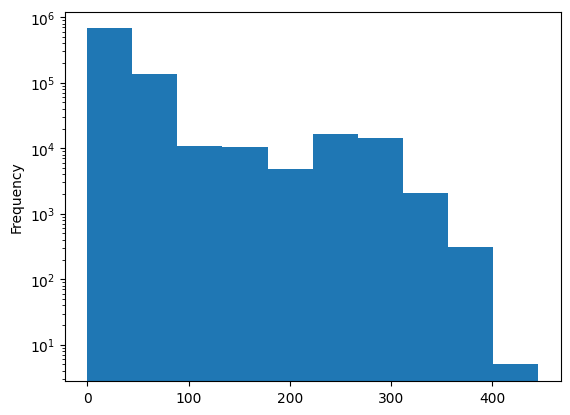

In [8]:
df = load_wells()
df.info()

print('--------depth---------')
df['Depth'].plot.hist(logy=True)
print(df['Depth'].max())
print(df['Depth'].min())
print(df['Depth'].mean())
print(df['Depth'].std())

--------arsenic--------
4000.0
0.0
41.208277842883085
74.48213356038045


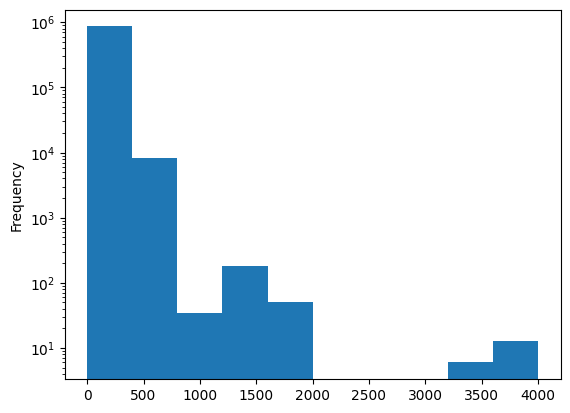

In [9]:
df = load_wells()

print('--------arsenic--------')
df['Arsenic'].plot.hist(logy=True)
print(df['Arsenic'].max())
print(df['Arsenic'].min())
print(df['Arsenic'].mean())
print(df['Arsenic'].std())

In [10]:
print(df['Division'].nunique())
print(df['District'].nunique())
print(df['Upazila'].nunique())
print(df['Union'].nunique())
print(df['Mouza'].nunique())

8
63
445
2838
9550


In [14]:
def null_accuracy():
    df = load_wells()
    df['Label'] = np.where(df['Arsenic'] > 10, 'polluted', 'safe')
    print(df['Label'].value_counts())
    
null_accuracy()

safe        475182
polluted    393496
Name: Label, dtype: int64
